<a href="https://colab.research.google.com/github/PatiGirl/Imers-o-Profissional/blob/main/C%C3%B3pia_de_7_1732745734530%2Bpatricia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Previsão de Preços de Imóveis no Brasil.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Objetivo:**
*Desenvolver um modelo de Machine Learning para prever os preços de imóveis com base em características como localização, área, e tipo de imóvel.*

In [4]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from sklearn.model_selection import cross_val_score

In [ ]:
# ================================================
# 1. Carregamento e Análise Inicial da Base de Dados
# ================================================
# Substitua pelo caminho do arquivo
arquivo = "/content/Brasile-real-estate-dataset.csv"
data = pd.read_csv(arquivo, encoding='ISO-8859-1')

# Exibir as primeiras linhas e informações gerais
print("Informações iniciais do dataset:")
print(data.head())
print(data.info())

# Verificar valores ausentes
print("\nValores ausentes:")
print(data.isnull().sum())

# Estatísticas básicas
print("\nEstatísticas descritivas:")
print(data.describe())

FileNotFoundError: [Errno 2] No such file or directory: '/content/Brasile-real-estate-dataset.csv'

In [7]:
# ================================================
# 2. Limpeza e Pré-processamento
# ================================================
# Preencher valores ausentes em 'area_m2' com a mediana
data['area_m2'].fillna(data['area_m2'].median(), inplace=True)

# Codificar variáveis categóricas
encoder = LabelEncoder()
data['property_type'] = encoder.fit_transform(data['property_type'])
data['state'] = encoder.fit_transform(data['state'])
data['region'] = encoder.fit_transform(data['region'])

NameError: name 'data' is not defined

In [ ]:
# ================================================
# 3. Tratamento de Outliers
# ================================================
# Calcular o intervalo interquartil (IQR)
Q1 = data['price_brl'].quantile(0.25)
Q3 = data['price_brl'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar os dados dentro do intervalo
data_cleaned = data[(data['price_brl'] >= lower_limit) & (data['price_brl'] <= upper_limit)]

print(f"Número de registros antes da limpeza: {len(data)}")
print(f"Número de registros após a limpeza: {len(data_cleaned)}")

# Atualizar X e y com os dados limpos
X = data_cleaned[['property_type', 'state', 'region', 'area_m2', 'lat', 'lon']]
y = data_cleaned['price_brl']

# Dividir dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Número de registros antes da limpeza: 12833
Número de registros após a limpeza: 12572


In [ ]:
# ================================================
# 4. Treinamento e Avaliação dos Modelos
# ================================================
# Modelos que vamos testar
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Avaliar os modelos
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Treinar o modelo
    y_pred = model.predict(X_test)  # Fazer previsões
    mse = mean_squared_error(y_test, y_pred)  # Calcular MSE
    r2 = r2_score(y_test, y_pred)  # Calcular R²
    results[model_name] = {"MSE": mse, "R²": r2}

# Exibir os resultados
print("\nComparação dos Modelos:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"  R²: {metrics['R²']:.2f}")

# Avaliar os modelos com validação cruzada
cv_results = {}
for model_name, model in models.items():
    # Realizar validação cruzada (5 folds)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    mean_score = np.mean(scores)
    cv_results[model_name] = {
        "Cross-Validated R²": mean_score
    }

# Exibir os resultados de validação cruzada
print("\nResultados da Validação Cruzada:")
for model_name, metrics in cv_results.items():
    print(f"{model_name}:")
    print(f"  Cross-Validated R²: {metrics['Cross-Validated R²']:.2f}")



Comparação dos Modelos:
Random Forest:
  Mean Squared Error (MSE): 40270241253.79
  R²: 0.61
Linear Regression:
  Mean Squared Error (MSE): 68959552961.43
  R²: 0.33
Gradient Boosting:
  Mean Squared Error (MSE): 41808906400.77
  R²: 0.59

Resultados da Validação Cruzada:
Random Forest:
  Cross-Validated R²: 0.62
Linear Regression:
  Cross-Validated R²: 0.35
Gradient Boosting:
  Cross-Validated R²: 0.61


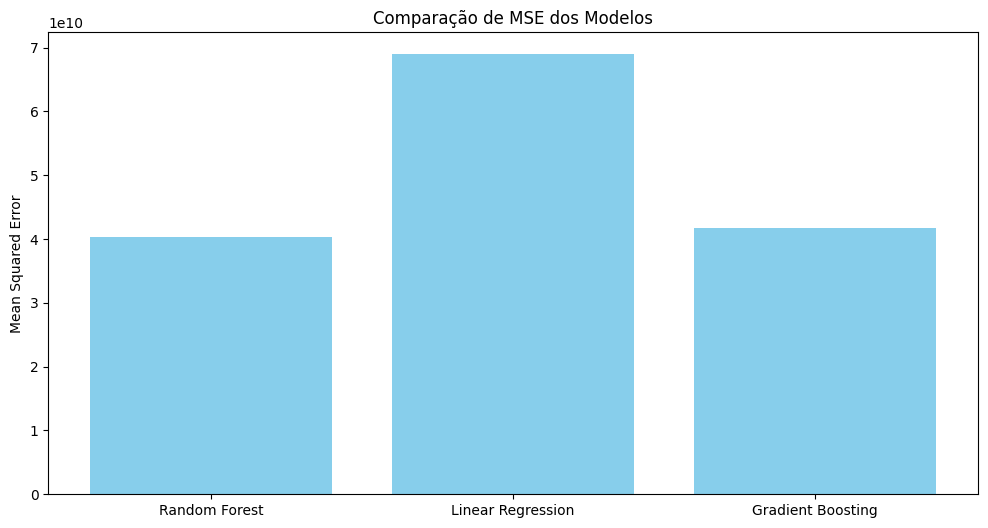

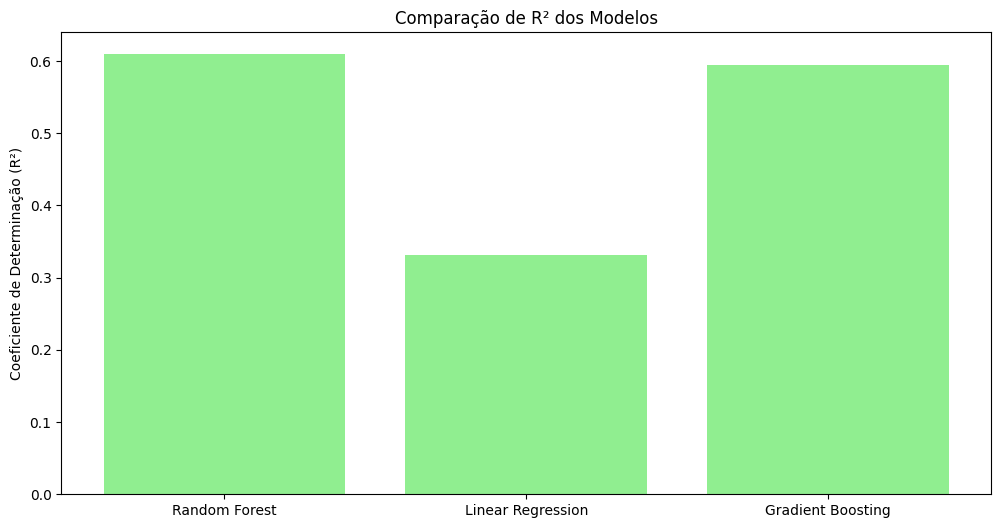

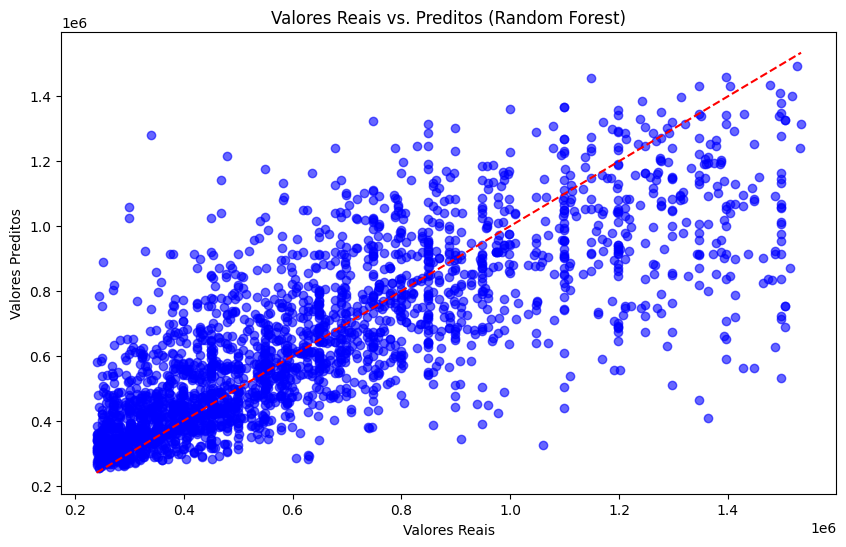

In [ ]:
# ================================================
# 5. Visualização Comparativa
# ================================================
# Dados para os gráficos
model_names = list(results.keys())
mse_values = [metrics['MSE'] for metrics in results.values()]
r2_values = [metrics['R²'] for metrics in results.values()]

# Comparação de MSE
plt.figure(figsize=(12, 6))
plt.bar(model_names, mse_values, color='skyblue')
plt.title("Comparação de MSE dos Modelos")
plt.ylabel("Mean Squared Error")
plt.show()

# Comparação de R²
plt.figure(figsize=(12, 6))
plt.bar(model_names, r2_values, color='lightgreen')
plt.title("Comparação de R² dos Modelos")
plt.ylabel("Coeficiente de Determinação (R²)")
plt.show()

# Visualizar os valores reais vs. preditos para o melhor modelo
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title(f"Valores Reais vs. Preditos ({best_model_name})")
plt.show()


In [ ]:
# ================================================
# 6. Salvar o Melhor Modelo
# ================================================
# Escolher o melhor modelo com base no maior R²
best_model_name = max(results, key=lambda name: results[name]['R²'])
best_model = models[best_model_name]

# Salvar o modelo escolhido
joblib.dump(best_model, f"melhor_modelo_{best_model_name.replace(' ', '_').lower()}.pkl")
print(f"\nModelo {best_model_name} salvo como 'melhor_modelo_{best_model_name.replace(' ', '_').lower()}.pkl'")


NameError: name 'results' is not defined